In [1]:
import pandas as pd
import random as rm
import numpy as np

import matplotlib.pyplot as plt
from scipy.stats import truncnorm
import seaborn as sns

## Cambiamos el nombre de las columnas por nombres que sean mas accesibles


In [2]:
df_con = pd.read_csv("ventas_condones.csv");
df_con.columns = ['year', 'country', 'sales',
       'revenue', 'campaigns',
       'awareness', 'type',
       'contraceptive_rate', 'teen_pregnancy',
       'hiv_prevention', 'online_sales',
       'price', 'male_female',
       'dominance', 'sex_education']

In [3]:
df_con.head(10)

,year,country,sales,revenue,campaigns,awareness,type,contraceptive_rate,teen_pregnancy,hiv_prevention,online_sales,price,male_female,dominance,sex_education
0,2015,USA,378,276.304977,No,2.93,Latex,27.10,58.37,89.17,45.00,1.34,69% Male - 39% Female,Kamasutra,No
1,2015,USA,1875,3002.379846,No,9.28,Ultra-Thin,63.97,50.63,69.25,57.10,2.43,50% Male - 33% Female,Skyn,No
2,2015,USA,2496,6564.222333,Yes,5.26,Non-Latex,56.21,42.23,56.13,59.52,2.30,46% Male - 54% Female,Skyn,Yes
3,2015,USA,1437,4993.892125,Yes,3.63,Non-Latex,89.71,55.86,78.36,56.83,2.48,49% Male - 57% Female,Manforce,No
4,2015,USA,1923,5355.152313,Yes,5.71,Non-Latex,86.96,7.82,37.61,47.99,0.34,40% Male - 29% Female,Trojan,Yes
5,2015,India,1273,4200.754788,No,9.48,Non-Latex,69.16,56.18,60.86,5.07,1.52,73% Male - 48% Female,Kamasutra,No
6,2015,India,1580,4856.165906,No,9.31,Ultra-Thin,40.95,34.12,90.31,23.89,2.31,42% Male - 44% Female,Skyn,Yes
7,2015,India,116,103.446367,No,3.15,Non-Latex,17.97,43.23,54.99,61.79,1.33,58% Male - 29% Female,Skyn,No
8,2015,India,1774,5508.894147,Yes,9.09,Non-Latex,94.18,67.43,79.34,11.33,1.28,72% Male - 28% Female,Trojan,Yes
9,2015,India,127,201.716851,Yes,4.79,Non-Latex,27.39,69.19,59.64,17.67,1.15,48% Male - 57% Female,Trojan,Yes


In [4]:
num_registros = len(df_con)
print(f"El dataset tiene {num_registros} registros")

El dataset tiene 550 registros


In [5]:
print(f"Variables: {df_con.shape[1]}")
print("\nTipos de datos:")
print(df_con.dtypes.value_counts())

Variables: 15

Tipos de datos:
float64    7
object     6
int64      2
Name: count, dtype: int64


## Eliminamos las columnas que no vamos a utilizar

In [6]:
df_con = df_con.drop(columns = ['male_female', 'year', 'campaigns', 'dominance', 'sex_education'])

## Creamos funciones para obtener las columnas numericas y cartegoricas

In [7]:
def getInt(df):
    col_number = [];
    for column in df:
        if(df[column].dtype != 'O' and column != 'year'):
            col_number.append(column)
    return col_number

def getCat(df):
    col_cat = [];
    for column in df:
        if(df[column].dtype == 'O' or column == 'year'):
            col_cat.append(column)
    return col_cat

In [8]:
col_num = getInt(df_con)
col_cat = getCat(df_con)

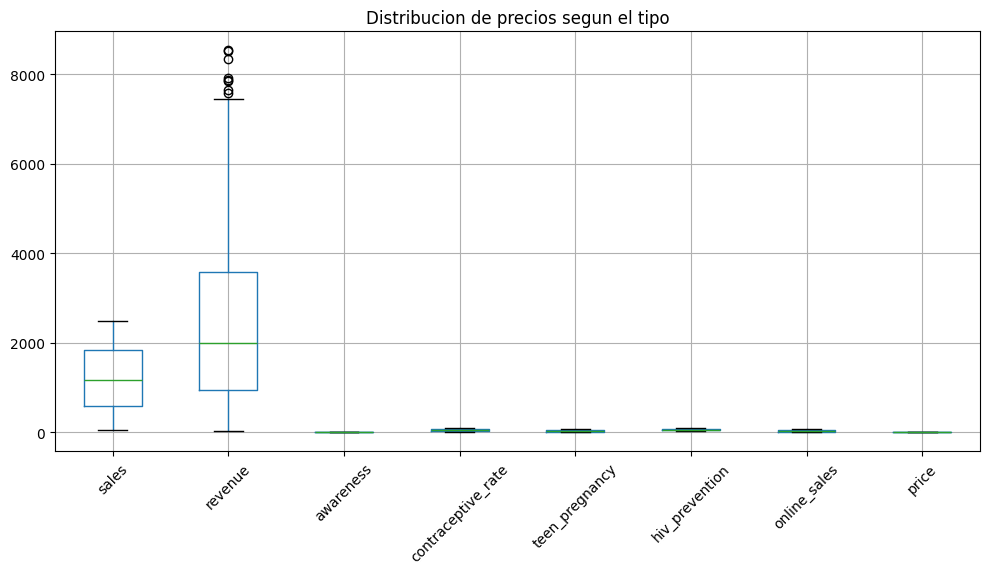

In [9]:
df_con.boxplot(column=col_num, figsize=(10, 6), rot=45)
plt.title('Distribucion de precios segun el tipo')
plt.suptitle('')
plt.tight_layout()
plt.show()

In [10]:
df_con[col_num].describe()

,sales,revenue,awareness,contraceptive_rate,teen_pregnancy,hiv_prevention,online_sales,price
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000
mean,1217.850909,2460.104428,6.248382,54.625527,34.780055,62.049836,36.902309,1.360891
std,707.861532,1908.028885,2.393678,22.865826,19.778428,21.341931,19.256040,0.664664
min,51.000000,34.656206,2.010000,15.020000,2.020000,25.070000,5.010000,0.200000
25%,599.750000,947.550178,4.065000,34.775000,17.532500,43.860000,19.565000,0.782500
50%,1160.000000,2002.374241,6.435000,53.920000,34.705000,63.125000,35.505000,1.390000
75%,1846.000000,3593.351620,8.432500,75.747500,50.787500,79.990000,52.917500,1.927500
max,2500.000000,8536.163259,9.980000,94.970000,69.890000,98.840000,69.960000,2.490000


## Eliminamos valores atipicos

### Resumen Estadistico

In [11]:
def resumenEstadistico(column):
    transformations = {}
    new_col = []
    for c in column:
        transformations[c] = [
            ('lower_bound', lambda x: x.quantile(.25) - 1.5*(x.quantile(.75) - x.quantile(.25)) if x.quantile(.75) != x.quantile(.25) else x.min()),
            ('upper_bound', lambda x: x.quantile(.75) + 1.5*(x.quantile(.75) - x.quantile(.25)) if x.quantile(.75) != x.quantile(.25) else x.max())
        ]
        new_col.append(f"{c}_lower_bound")
        new_col.append(f"{c}_upper_bound")

    return [transformations, new_col]

In [12]:
data = resumenEstadistico(col_num)

df_result = df_con.groupby(col_cat, as_index = False).agg(data[0])
df_result.columns = col_cat + data[1]
df_result.head(10)

,country,type,sales_lower_bound,sales_upper_bound,revenue_lower_bound,revenue_upper_bound,awareness_lower_bound,awareness_upper_bound,contraceptive_rate_lower_bound,contraceptive_rate_upper_bound,teen_pregnancy_lower_bound,teen_pregnancy_upper_bound,hiv_prevention_lower_bound,hiv_prevention_upper_bound,online_sales_lower_bound,online_sales_upper_bound,price_lower_bound,price_upper_bound
0,Australia,Latex,-1683.000,4077.000,-2004.404754,6481.711286,0.2650,13.8250,-15.65000,131.63000,-9.94500,80.09500,-29.68500,167.87500,-11.43500,76.28500,-0.88500,3.23500
1,Australia,Non-Latex,-1508.500,3303.500,-1204.712408,3363.056262,1.8300,13.9100,-40.84500,132.87500,-46.04000,103.88000,-23.34500,147.81500,-20.21500,93.50500,-1.65500,4.46500
2,Australia,Textured,-692.000,2544.000,-2762.354370,6070.507790,-3.6800,14.4400,0.20000,94.60000,-28.98250,103.39750,-35.03500,159.72500,-34.50500,109.93500,-1.42250,3.91750
3,Australia,Ultra-Thin,-1177.375,3533.625,-2446.542206,6080.260015,3.9500,12.5900,-1.13250,80.06750,-23.92750,87.11250,-9.80625,127.06375,-46.87375,122.05625,0.55625,2.68625
4,Brazil,Latex,-1480.875,4080.125,-3282.640744,9566.083906,1.0450,10.8050,-25.49250,141.12750,-49.95000,107.53000,-35.54125,153.20875,-43.73375,125.25625,-0.73500,3.82500
5,Brazil,Non-Latex,-993.000,2487.000,-4350.831902,7761.261455,0.9600,13.6000,49.05000,65.61000,-25.43000,96.97000,-9.70000,147.66000,-37.25500,102.46500,0.40000,3.12000
6,Brazil,Textured,-586.500,3585.500,-4199.741699,10555.225200,-0.0875,13.6725,5.88500,131.84500,-21.03875,94.99125,18.07250,108.01250,-11.53000,72.57000,-0.76750,3.37250
7,Brazil,Ultra-Thin,-1631.125,3913.875,-3686.244283,7679.808035,-3.3125,15.9675,-5.93500,134.66500,-31.34500,101.87500,-10.08500,130.75500,-56.94750,129.95250,-1.16000,3.58000
8,China,Latex,-66.750,2927.250,-172.587046,5925.582322,-2.4275,14.7125,-9.25625,97.23375,-35.78500,75.91500,-2.62125,109.88875,-44.79875,111.33125,0.32875,2.25875
9,China,Non-Latex,-1585.500,4510.500,-2298.962677,7048.791322,1.0175,13.3575,-2.85500,119.50500,-42.51500,115.80500,-6.24500,132.35500,-11.94500,83.29500,0.14750,1.68750


In [13]:
df_con.head(10)

,country,sales,revenue,awareness,type,contraceptive_rate,teen_pregnancy,hiv_prevention,online_sales,price
0,USA,378,276.304977,2.93,Latex,27.10,58.37,89.17,45.00,1.34
1,USA,1875,3002.379846,9.28,Ultra-Thin,63.97,50.63,69.25,57.10,2.43
2,USA,2496,6564.222333,5.26,Non-Latex,56.21,42.23,56.13,59.52,2.30
3,USA,1437,4993.892125,3.63,Non-Latex,89.71,55.86,78.36,56.83,2.48
4,USA,1923,5355.152313,5.71,Non-Latex,86.96,7.82,37.61,47.99,0.34
...,...,...,...,...,...,...,...,...,...,...
545,Australia,585,876.695845,5.53,Textured,77.79,52.35,89.26,20.34,0.48
546,Australia,273,311.965966,3.43,Textured,48.71,32.15,85.71,15.77,1.96
547,Australia,994,2787.762423,5.52,Textured,57.73,63.18,33.34,18.98,1.10
548,Australia,730,938.731002,6.73,Ultra-Thin,30.33,32.88,61.39,16.43,0.87


In [14]:
df_bound = df_con.merge(
                df_result
                , on=col_cat
                , how="inner"
            )

df_bound.shape[0]

550

In [15]:
def reducirData(columns, df):
    for c in columns:

        df = df.loc[
            ( df[c] > df[f"{c}_lower_bound"])
            &
            ( df[c] < df[f"{c}_upper_bound"])
        ]
    return df  

In [16]:
df_bound = reducirData(col_num, df_bound)
df_bound.shape[0]

505

In [17]:
df_clean = df_bound.loc[:, col_cat + col_num]

### Razon de la reduccion tan drastica sin reducir los grupos
Hay poca variedad de los datos que solo hay un grupo de cada uno y por eso el valor interquantile es 0

In [18]:
df_con[col_cat].loc[df_con['country'] == 'Australia'].head(10)

,country,type
45,Australia,Ultra-Thin
46,Australia,Textured
47,Australia,Ultra-Thin
48,Australia,Non-Latex
49,Australia,Textured
95,Australia,Latex
96,Australia,Textured
97,Australia,Non-Latex
98,Australia,Non-Latex
99,Australia,Non-Latex


## Obtenemos las probabilidades categoricas

In [19]:
def getProb(cats, df):
    prob_index = {}
    index = 0
    for cat in cats:
        array_prob = [[],[]]
        vals = df_con[cat].drop_duplicates().to_list()
        for val in vals:
            array_prob[0].append(val)
            array_prob[1].append(df_con[cat].loc[df_con[cat] == val].count()/df_con[cat].count())
        prob_index[cat] = array_prob
    return prob_index

In [20]:
probs = getProb(col_cat, df_con)
probs

{'country': [['USA',
   'India',
   'UK',
   'Brazil',
   'Germany',
   'South Africa',
   'China',
   'Japan',
   'France',
   'Australia'],
  [np.float64(0.1),
   np.float64(0.1),
   np.float64(0.1),
   np.float64(0.1),
   np.float64(0.1),
   np.float64(0.1),
   np.float64(0.1),
   np.float64(0.1),
   np.float64(0.1),
   np.float64(0.1)]],
 'type': [['Latex', 'Ultra-Thin', 'Non-Latex', 'Textured'],
  [np.float64(0.2290909090909091),
   np.float64(0.2545454545454545),
   np.float64(0.2290909090909091),
   np.float64(0.2872727272727273)]]}

## Obtenemos los valores maximos, minimos, media, mediana... de los valores numericos

In [21]:
def getValForSim(columns):
    summ_agregations = {}
    cols_sum = []
    for c in columns:
        summ_agregations[c] = ['min', 'max', 'mean', 'std']
        cols_sum.append(f"{c}_min")
        cols_sum.append(f"{c}_max")
        cols_sum.append(f"{c}_mean")
        cols_sum.append(f"{c}_std")
        
    return [summ_agregations, cols_sum];

In [22]:
data = getValForSim(col_num)

df_sum = df_clean.groupby(
    col_cat
    , as_index = False
).agg(data[0])

In [31]:
df_sum.columns = col_cat + data[1]
df_sum.head(10)

,country,type,sales_min,sales_max,sales_mean,sales_std,revenue_min,revenue_max,revenue_mean,revenue_std,...,hiv_prevention_mean,hiv_prevention_std,online_sales_min,online_sales_max,online_sales_mean,online_sales_std,price_min,price_max,price_mean,price_std
0,Australia,Latex,199,2270,1094.833333,728.107239,629.159422,4260.695976,2092.904208,1227.756053,...,66.583333,23.647100,7.12,60.93,34.749167,15.910363,0.33,2.13,1.235833,0.579537
1,Australia,Non-Latex,133,2179,936.166667,752.652864,168.453543,2661.998634,1048.312904,775.431587,...,59.480833,24.374142,8.28,57.01,36.058333,17.459771,0.34,2.44,1.474167,0.789942
2,Australia,Textured,125,2083,932.266667,557.783556,309.350625,3701.363082,1745.530030,1199.657716,...,65.222667,25.021002,14.98,67.28,38.529333,19.351124,0.46,2.36,1.234667,0.694909
3,Australia,Ultra-Thin,56,2459,1095.818182,784.469224,41.481460,5178.539859,1863.283962,1560.081948,...,57.451818,21.949083,14.68,66.72,39.670000,20.398490,0.87,2.48,1.632727,0.458041
4,Brazil,Latex,316,2359,1350.833333,739.105759,653.992723,7853.439272,3327.599986,2278.382171,...,55.221111,23.789381,6.11,69.39,39.578889,21.662073,0.20,2.40,1.425000,0.733663
5,Brazil,Non-Latex,90,2352,1226.500000,936.481660,133.791957,7061.263675,3122.271889,2804.875126,...,61.640000,19.283214,6.85,60.68,30.793333,22.283478,1.42,2.36,1.840000,0.338644
6,Brazil,Textured,296,2500,1588.500000,746.647477,271.324773,6287.117791,3007.640127,2187.655955,...,61.441667,16.203756,12.08,67.44,34.122500,18.464916,0.57,2.28,1.362500,0.592853
7,Brazil,Ultra-Thin,74,2354,1141.375000,757.714095,220.681178,6795.475288,2171.521281,2040.060803,...,63.648750,22.866606,5.31,66.92,37.382500,23.882068,0.32,2.31,1.291875,0.675566
8,China,Latex,72,2238,1348.928571,625.032118,125.357065,4660.266003,2792.343022,1230.073641,...,54.420714,20.777731,5.01,69.76,32.871429,22.243809,0.33,1.78,1.174286,0.469545
9,China,Non-Latex,316,2378,1224.166667,859.349618,519.428964,3598.010796,2132.679810,1369.690894,...,62.901667,25.573017,7.61,63.57,40.830000,18.620774,0.27,1.19,0.823333,0.330192


## Crea las columnas a simular

In [24]:
def get_values(df, columns, size):
    settings = {}
    
    for c in columns:
        settings[c] = trunc_vectorial(
        df.iloc[0][f"{c}_min"],
        df.iloc[0][f"{c}_max"],
        df.iloc[0][f"{c}_mean"],
        df.iloc[0][f"{c}_std"],
        size
        )
        
    return settings

def trunc_vectorial(min_val, max_val, media, desv_std, size):

    a, b = (min_val - media) / desv_std, (max_val - media) / desv_std
    muestras = truncnorm.rvs(a,b, loc=media, scale=desv_std, size=size)
    
    return muestras

def returnDic_cat (registrosSimular, size):
    d_r = {}
    for key in registrosSimular.keys():

        d_r[key] = np.random.choice(registrosSimular[key][0], size, registrosSimular[key][0])

    return d_r


In [25]:
size = 100000

registrosSimular_cat = probs
simulacion_cat = returnDic_cat(registrosSimular_cat, size);

registrosSimular_num = df_sum
simulacion_num = get_values(registrosSimular_num, col_num, size)

simulacion_cat.update(simulacion_num)


In [26]:
simulacion = pd.DataFrame(simulacion_cat)

In [27]:
simulacion.shape[0]

100000

## Comparacion de datos numericos

In [28]:
simulacion[col_num].describe()

,sales,revenue,awareness,contraceptive_rate,teen_pregnancy,hiv_prevention,online_sales,price
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,1160.922618,2254.904430,6.004020,61.096619,39.894877,67.677498,34.556599,1.232726
std,517.631225,894.779913,1.538107,16.941502,14.266118,15.106872,12.753416,0.440563
min,199.034332,629.248228,2.810343,25.387284,9.040857,39.462927,7.123509,0.330052
25%,746.988598,1544.442249,4.816698,48.286301,29.198445,55.567006,24.977842,0.896970
50%,1143.393032,2212.363734,6.034730,61.419809,40.146353,67.489725,34.662900,1.233220
75%,1554.680607,2924.903281,7.212219,74.352109,50.866985,79.520781,44.161182,1.571589
max,2269.961458,4260.593843,8.959978,93.828160,68.207251,97.509869,60.929441,2.129904


In [34]:
df_clean[col_num].describe()

,sales,revenue,awareness,contraceptive_rate,teen_pregnancy,hiv_prevention,online_sales,price
count,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000
mean,1192.279208,2344.271485,6.201149,54.150812,35.079881,61.588554,37.453762,1.358772
std,694.836854,1759.306032,2.391622,22.692502,19.689133,21.347557,19.206909,0.659622
min,51.000000,34.656206,2.010000,15.020000,2.310000,25.070000,5.010000,0.200000
25%,592.000000,942.693994,4.040000,34.420000,17.660000,43.600000,20.160000,0.800000
50%,1125.000000,1967.056213,6.330000,53.540000,35.450000,61.540000,37.270000,1.380000
75%,1786.000000,3421.375577,8.350000,74.010000,50.840000,79.260000,54.130000,1.920000
max,2500.000000,8515.005155,9.980000,94.850000,69.890000,98.840000,69.960000,2.490000


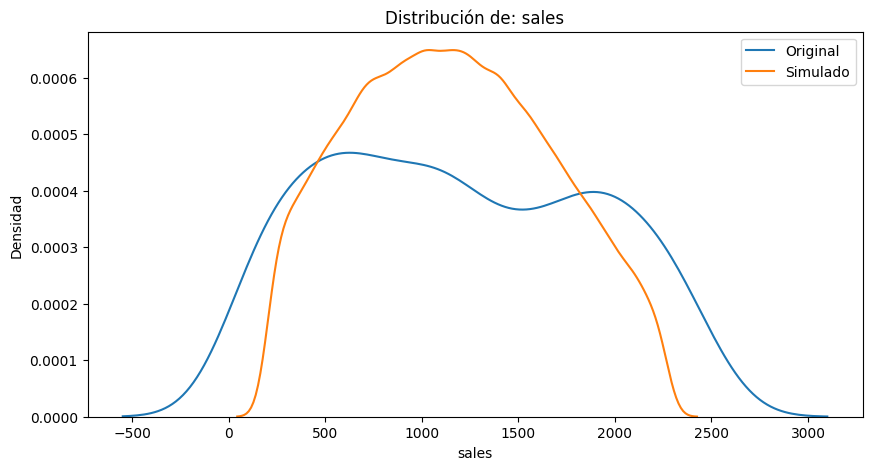

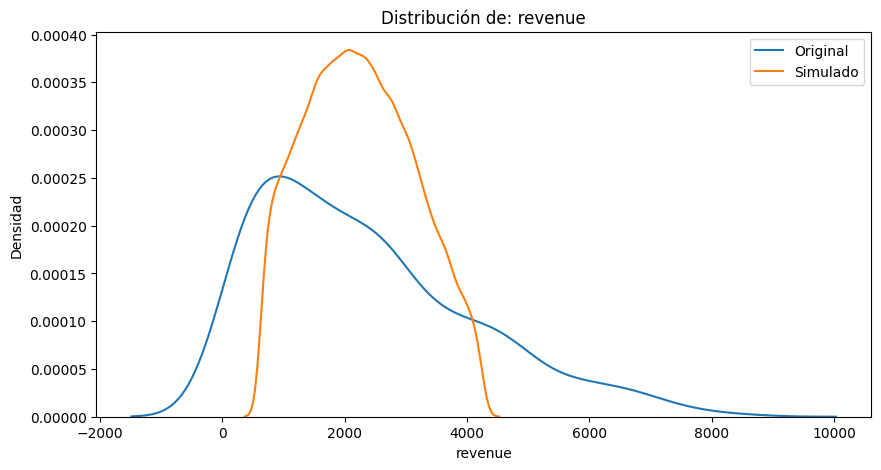

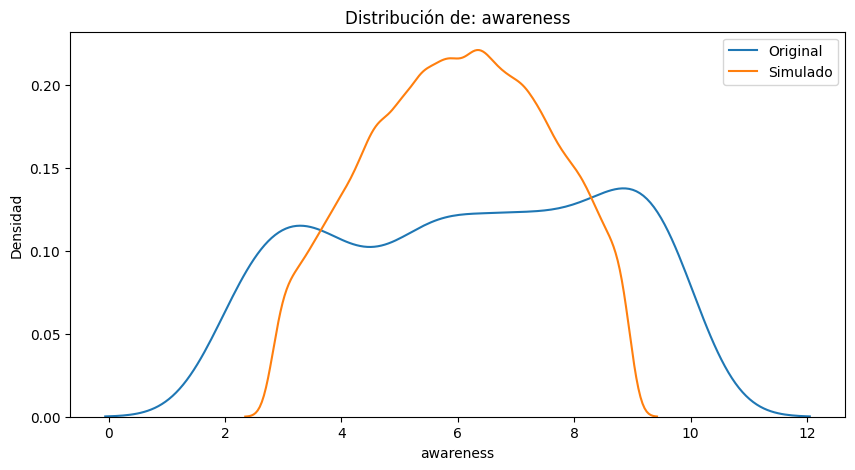

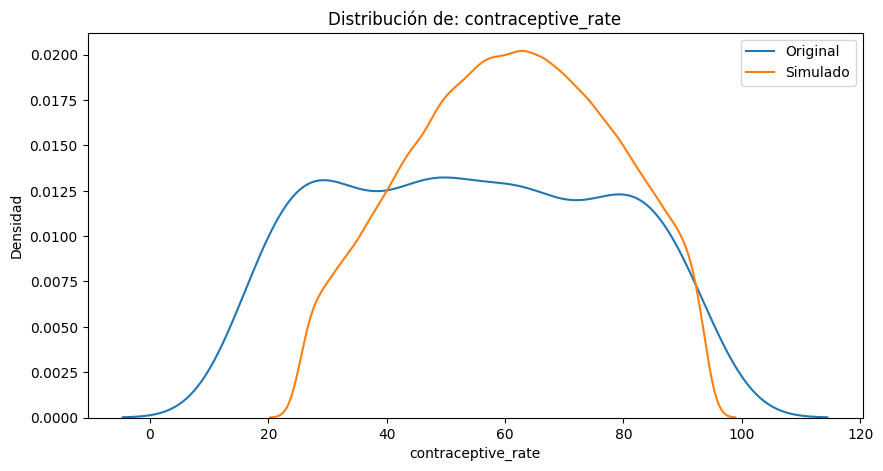

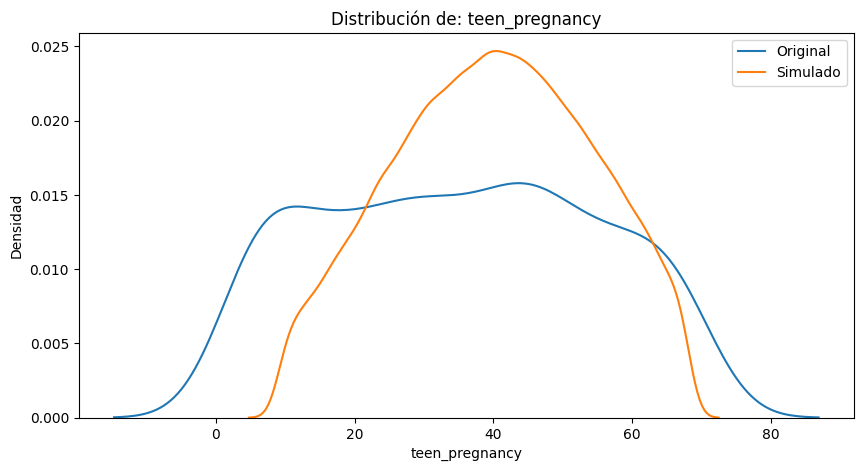

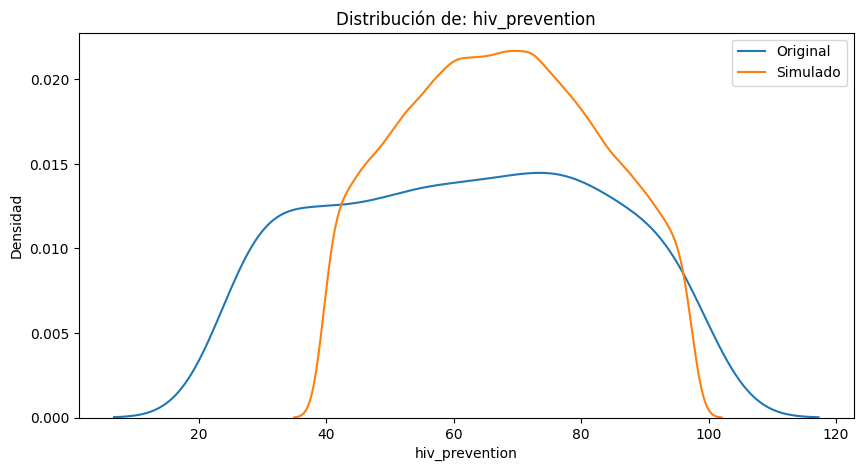

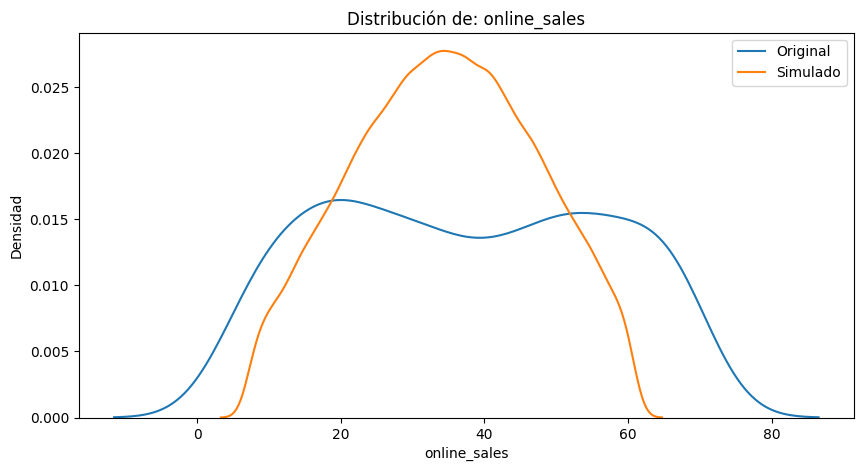

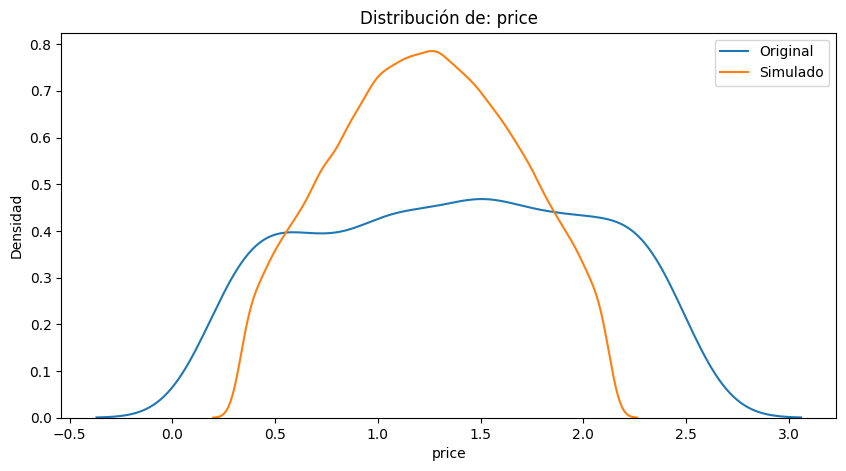

In [30]:
for col in col_num:
    plt.figure(figsize=(10,5))
    sns.kdeplot(df_clean[col], label='Original')
    sns.kdeplot(simulacion[col], label='Simulado')
    plt.title(f'Distribución de: {col}')
    plt.xlabel(col)
    plt.ylabel('Densidad')
    plt.legend()
    plt.show()